# RSA Demonstration

Import my RSA package into the environment

In [1]:
from RSA import *

### Key Generation
Declare the bit size we want to use

In [2]:
bitSize = 40

Generate a set of RSA keys with appropriate bitsize

In [3]:
RSA_keys = generate_RSA.KeyGen(bitSize, True, True)     # initalise object True sets verbose and demo flag on KeyGen
RSA_keys.generateKeys()                                 # runs generator

Generating  20 bit prime... 
10 rounds of Miller-Rabin needed (according to FISC)
Trial-Division prime list generated, size:  128
New candidate... 910595
New candidate... 642493
New candidate... 649451
New candidate... 881977
New candidate... 700409
New candidate... 651047
New candidate... 984121
Prime of  20 bits found: 984121
Checked 7 candidates in 0.01 s
Generating  20 bit prime... 
10 rounds of Miller-Rabin needed (according to FISC)
Trial-Division prime list generated, size:  128
New candidate... 597751
New candidate... 650311
New candidate... 1014319
Prime of  20 bits found: 1014319
Checked 3 candidates in 0.00 s

p: 984121
q: 1014319

n: 998212628599
e: 776914918111
n bit length: 40
Private-Key, d: 297020253871
Public-Key: (998212628599, 776914918111)
Private-Key: 297020253871
n is 40 bits



True

### Brute Force Algorithm

The simplest approach. 

- Take the $\sqrt{n}$ and check if it divides n. 
- If it does not enumerate each odd smaller than $\sqrt{n}$ until a factor is found. 
- $O(\sqrt{n})$ (ignoring logarithmic test for division)

In [4]:
bf = brute_force.BFSolver(RSA_keys.n, RSA_keys.e, True, True)   # pass it public keys, and True verbose & demo flag
bf.solve()                                                      # run solver

'998212628599 % 984121 = 0'

p: 984121
q: 1014319
Private-Key, d: 297020253871
Numbers checked: 7493
Space used: 2 bytes
Time taken: 0.529 s


True

### Make it a bit harder

In [5]:
bitSize = 46

RSA_keys = generate_RSA.KeyGen(bitSize, True)     # initalise object True sets verbose flag on KeyGen
RSA_keys.generateKeys()                           # runs generator

Prime of  23 bits found: 8079299
Checked 1 candidates in 0.00 s
Prime of  23 bits found: 6375449
Checked 9 candidates in 0.00 s

p: 8079299
q: 6375449

n: 51509158730251
e: 18162887780965
n bit length: 46
Private-Key, d: 18057121481405
Public-Key: (51509158730251, 18162887780965)
Private-Key: 18057121481405
n is 46 bits



True

### Fermat's Factorisation Method

Relies on Fermat’s observation that any odd number can be represented as the
difference of two squares. 

- We again start with $γ ← \sqrt{n}$
- now we increment γ a single numberat a time until $γ^2 \; mod \; n \; = \; b^2$ where b is an integer. 
- then $\{p,q\} = γ \pm b$
- The worst-case time-complexity is exactlythe same as for brute-force, $O(\sqrt{n})$

In [6]:
ff = fermats.FFSolver(RSA_keys.n, RSA_keys.e, True, True)   # pass it public keys, and True verbose & demo flag
ff.solve()                                                  # run solver

'sqrt(52234934935876 - 51509158730251) = 851925.0'

p: 6375449
q: 8079299
Private-Key, d: 18057121481405
Numbers checked: 50387
Space used: 6 bytes
Time taken: 2.396 s


True

### KNJ - Factorisation

The same as brute-force, but includes a check for prime numbers first. 

- Take the $\sqrt{n}$ and check if it divides n. 
- If it does not enumerate each prime number smaller than $\sqrt{n}$ until a factor is found. 
- $O(\frac{\sqrt{n}}{log(\sqrt{n})})$ (estimation of the number of primes up to $\sqrt{n}$)

In [7]:
knj = knj_factorisation.KNJSolver(RSA_keys.n, RSA_keys.e, True, True)   # pass it public keys, and True verbose & demo flag
knj.solve()                                                             # run solver

'51509158730251 % 6375449 = 0'

p: 6375449
q: 8079299
Private-Key, d: 18057121481405
Numbers checked: 50992
Space used: 975708 bytes
Time taken: 2.163 s


True

### Pollard's p-1 

Is our first probabilistic algorithm:

- Utilises Fermat's little theorem 
- for a semi-prime $n \leftarrow pq$, if $x \leftarrow a^{K(p-1)} \equiv 1 \; mod \; p$ then the $gcd(x - 1, n)$ will be divisible by $p$
- We use a B-powersmooth number to find this large multiple
- If our B is too high and both p and q are B-powersmooth it fails
- So is probabilistic and we have to backtrack our B (or increase it)
- $O(B \log{B} \log_2n)$

In [8]:
polMin = pollard_p_minus_1.PSolver(RSA_keys.n, RSA_keys.e, True, True)   # pass it public keys, and True verbose & demo flag
polMin.solve()                                                           # run solver

'Testing B = 104579'

p: 8079299
q: 6375449
Private-Key, d: 18057121481405
Numbers checked: 9998
Space used: 132 bytes
Time taken: 2.314 s


True

### Pollard's-$\rho$ method


Another probabilistic method:

- A random but known sequence is generated $\{x_k \; mod \; n\}$
- This has a relation with the sequence mod a factor of $n$, $\{x_k \; mod \; p\}$
- Send runners y and z around the sequence, one twice as fast as the other 
- $gcd(x_y - x_z, n)$ will return a non trivial answer if the smaller, $p$ cycle repeats itself
- This is called Floyd's cycle detection
- $O(n^{1/4})$ via the birthday-paradox

In [9]:
rho = pollard_rho.RhoSolver(RSA_keys.n, RSA_keys.e, True, True)   # pass it public keys, and True verbose & demo flag
rho.solve()                                                       # run solver

'gcd(8407385295325 - 29526480887459, 51509158730251) = 6375449'

p: 6375449
q: 8079299
Private-Key, d: 18057121481405
Numbers checked: 653
Space used: 10 bytes
Time taken: 0.077 s


True

### Quadratic Sieve

In essence, this is advanced Fermat's Factoring:

- We no longer care about testing for one $\beta \leftarrow a^2 \; mod \; n$ until $\beta$ is a square number
- We instead build a congruence of squares, s.t. the product is a square ($b^2 \leftarrow \beta _1 * ... * \beta _k \; s.t. \; b \in N $)
- Again a smoothness bound, B, is used to ensure each $\beta$ can be fully factored over a small number of primes 
- A matrix is then built of prime-exponent vectors for each $\beta$
- Matrix elimination is then applied to find the zero vector, which means the number produced is square
- This sum of vectors used to produce the zero vectors can then be used to determine the factors
- A hard time-complexity to define, but should be sub-exponential

In [10]:
# need to recalculate as only 100% guarenteed for these very small sizes 

bitSize = 20

RSA_keys = generate_RSA.KeyGen(bitSize, True)     # initalise object True sets verbose flag on KeyGen
RSA_keys.generateKeys()                           # runs generator

Prime of  10 bits found: 859
Checked 2 candidates in 0.00 s
Prime of  10 bits found: 733
Checked 4 candidates in 0.00 s

p: 859
q: 733

n: 629647
e: 72835
n bit length: 20
Private-Key, d: 618907
Public-Key: (629647, 72835)
Private-Key: 618907
n is 20 bits



True

In [11]:
quad = quadratic_sieve.QSolver(RSA_keys.n, RSA_keys.e, True, True)  # pass it public keys, and True verbose & demo flag
quad.solve()                                                        # run solver

Length of possible primes: 528
Length of primes with quadRes(n,p) == 1: 261 

p: 859
q: 733
Private-Key, d: 618907
Numbers checked: 151
Space used: 136764 bytes
Time taken: 0.151 s


True

### Basic Analysis
Running the above algorithms on a variety of random inputs to create graphs showing general trends.

The below style code makes the format of the graphs nicer

In [12]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

Runs each algorithm in a thread and plots the results.

<IPython.core.display.Javascript object>


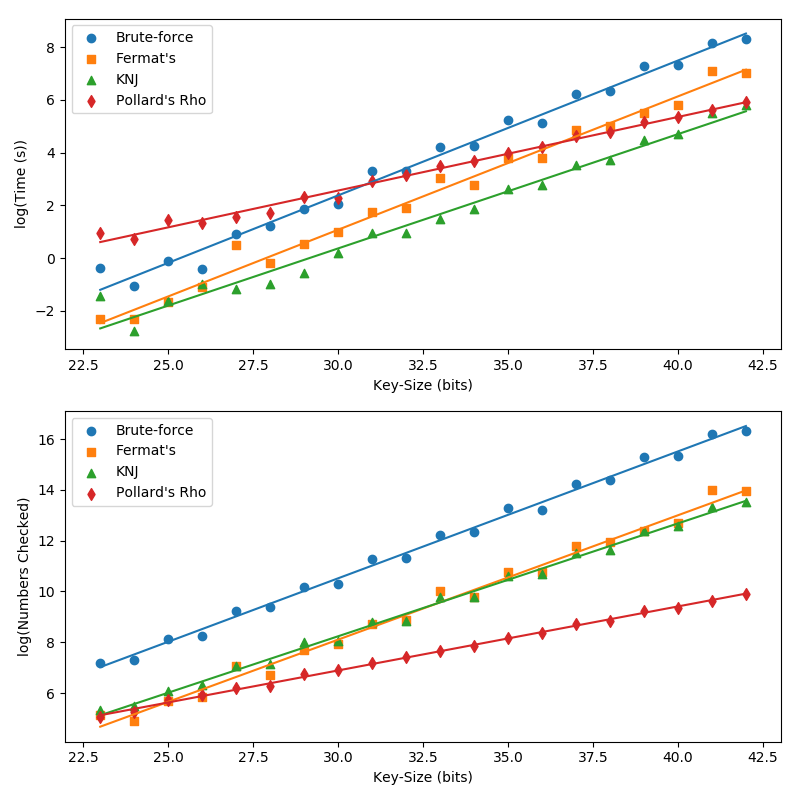

Press Enter to stop.


In [2]:
%matplotlib notebook
from graphs_RSA import *

COUNT = 250

minBit = 24
bf_bit = 44
ff_bit = 44
knj_bit = 44
rho_bit = 44

testGraphs(minBit, bf_bit, ff_bit, knj_bit, rho_bit, COUNT)

<img src="imgs/RSA.png" alt="drawing" style="width:90%;"/>